In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt


from datetime import datetime
from datetime import timedelta  

from psql_functions import execQuery
from miss_data import add_missing_dates, add_missing_counts

In [2]:
param_dic = {
    "host"      : "localhost",
    "database"  : "bachelorBesoeg2014",
    "user"      : "postgres",
    "password"  : "password",
    "port"      : "5432"
}

query = """select time_ from _775147;"""
result = execQuery(param_dic, query)
dates = [(date[0]) for date in result]

query = """select count_ from _775147;"""
result = execQuery(param_dic, query)

counts = [(count[0]) for count in result]

all_dates = add_missing_dates(dates)
all_counts =  add_missing_counts(counts, dates, all_dates)


Benefit over flat

In [3]:
D = 512
b = 2
#r = 10
h = int(np.ceil(np.log(D) / np.log(b)))
#alpha = (np.log(r) / np.log(b))
print(2*b*(np.log(D) / np.log(b))**2)


324.0


[  32  128  256  512 1024 2048]
[100 196 256 324 400 484]


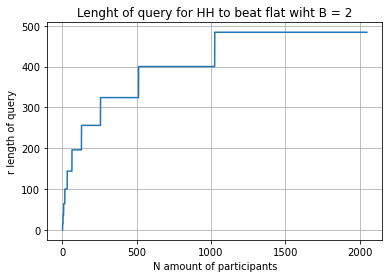

In [4]:
def myfunc_dis(x, b):
    return 2*b*int(np.ceil(np.log(x) / np.log(b)))**2

def myfunc_cont(x):
    return 2*b*(np.log(x) / np.log(b))**2

def plot_flat_vs_hh(b):
    xs = np.linspace(1,2048,10000)
    f2 = np.vectorize(myfunc_dis)
    plt.plot(xs,f2(xs, b))
    plt.grid()
    plt.xlabel("N amount of participants")
    plt.ylabel("r length of query")
    plt.title(f"Lenght of query for HH to beat flat wiht B = {b}")
    important_places = np.array([32,128,256,512,1024,2048])
    print(important_places)
    print(f2(important_places, b))

plot_flat_vs_hh(2)


[  32  128  256  512 1024 2048]
[ 96 150 216 216 294 294]


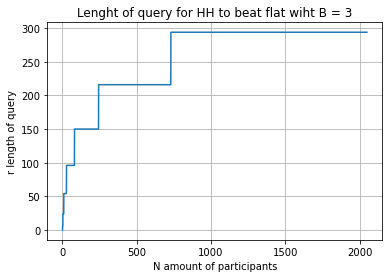

In [5]:
plot_flat_vs_hh(3)


[  32  128  256  512 1024 2048]
[ 72 128 128 200 200 288]


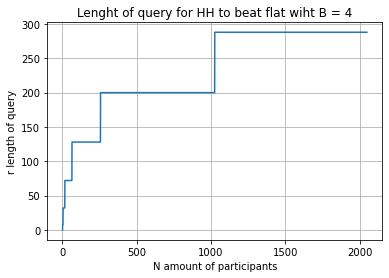

In [6]:
plot_flat_vs_hh(4)

In [7]:
def cal_lenght_of_range(D, b):
    h = int(np.ceil(np.log(D) / np.log(b)))
    alpha = (np.log(r) / np.log(b))
    return 2*b*(np.log(D) / np.log(b))**2

In [8]:
def sample_range_query(length, dates):
    while True:
        start_date_idx = np.random.randint((dates[-1]-dates[0]).days+1)
        start_date = dates[start_date_idx]
        end_date = dates[start_date_idx] + timedelta(days=(length-1))
        if dates[-1] > end_date:
            return (str(start_date), str(end_date))
length = 10
print(all_dates[:2])
a = sample_range_query(length, all_dates[:32])

[datetime.date(2014, 1, 2), datetime.date(2014, 1, 3)]


In [9]:
def max_disjoint_B_adic_ranges(r, B):
    # r = length, B = log base
    #Fact 3
    #Any sub-range of length[a,b]of length r from [D] can be decomposed into ≤ (B−1)(2 logBr+1)disjoint B-adic ranges.
    #(B−1)(2 logBr+1)
    return (B-1)*(2* np.log(r+1) / np.log(B))

In [10]:
B = 2
r = 20
print(max_disjoint_B_adic_ranges(r,B))
n = 74088
exp = 42
np.log(n) / np.log(exp)

8.784634845557521


3.0